In [32]:
#Libraries
import scipy.stats as stats
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [4]:
#Import dataframe
DS=pd.read_excel("CTG.xls","Datos")
DS.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,1996-12-01,CTG0001.txt,240,357,120,120,0,0,0,...,0,0,0,0,0,0,1,0,9,2
1,Fmcs_1.txt,1996-05-03,CTG0002.txt,5,632,132,132,4,0,4,...,0,0,0,1,0,0,0,0,6,1
2,Fmcs_1.txt,1996-05-03,CTG0003.txt,177,779,133,133,2,0,5,...,0,0,0,1,0,0,0,0,6,1
3,Fmcs_1.txt,1996-05-03,CTG0004.txt,411,1192,134,134,2,0,6,...,0,0,0,1,0,0,0,0,6,1
4,Fmcs_1.txt,1996-05-03,CTG0005.txt,533,1147,132,132,4,0,5,...,0,0,0,0,0,0,0,0,2,1


In [5]:
DS.shape
#View Columns
#for col in DS.columns: 
#    print(col) 

(2126, 40)

In [22]:
#Drop columns unnecessary
DN=DS.drop(DS.columns[0:5],axis=1)

In [23]:
DN.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,120,120,0,0,0,73,0.5,43,2.4,0,...,0,0,0,0,0,0,1,0,9,2
1,132,132,4,0,4,17,2.1,0,10.4,2,...,0,0,0,1,0,0,0,0,6,1
2,133,133,2,0,5,16,2.1,0,13.4,2,...,0,0,0,1,0,0,0,0,6,1
3,134,134,2,0,6,16,2.4,0,23.0,2,...,0,0,0,1,0,0,0,0,6,1
4,132,132,4,0,5,16,2.4,0,19.9,0,...,0,0,0,0,0,0,0,0,2,1


In [24]:
#Define X and y
X=DN.values[:,:-2]
y=DN.values[:,-1]


##### 

In [26]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,shuffle=True)

In [38]:
estDTC=SVC(kernel="linear",gamma=1)
estDTC.fit(X_train,y_train)
sDTC=cross_val_score(estDTC,X_test,y_test,cv=KFold(10,shuffle=True),scoring=make_scorer(accuracy_score))
print(np.mean(sDTC))

0.9812292358803987


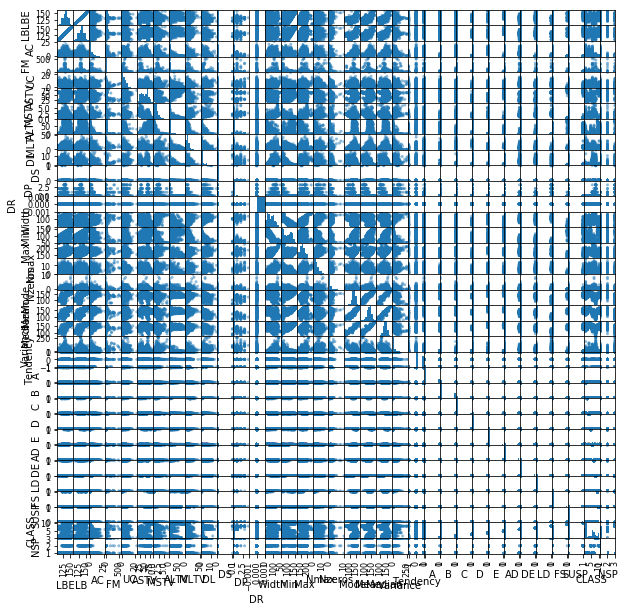

In [42]:
pd.plotting.scatter_matrix(DN, figsize=(10,10));